# OSNAP line Lagrangian particle tracking investigation of the cold/fresh blob


### The aim here is an investigation of the source of the cold/fresh blob which appeared in the near-surface Iceland Basin from about 2014. There are a couple of published explanations for the feature: 

- reduced heat/salt transport across RAPID array and northwards to subpolar N Atlantic over several years (Bryden et al. 2020?) or 
- increased contribution from Labrador Sea water flowing into subpolar North Atlantic rather than southwards (Holliday et al. 2020?). Driven I think by specific,  more intermittent, weather near Flemish Cap (though I need to read this again...)

## This notebook plots East Atlantic Pattern index and North Atlantic Oscillation index. From NOAA Climate Prediction Centre.

## Technical preamble

In [1]:
# import matplotlib.colors as colors
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
import seaborn as sns
# from matplotlib.colors import ListedColormap
import cmocean as co
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.lines as mlines


from matplotlib import colors as c
from matplotlib import ticker
# from xhistogram.xarray import histogram

In [91]:
sns.set(style="whitegrid")

xr.set_options(keep_attrs=True)
np.warnings.filterwarnings('ignore')

sns.set_palette("colorblind")
xr.set_options(keep_attrs=True);

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend
plt.rc('savefig', dpi=300)       # higher res outputs

## Set up paths and read in trajectory data

In [7]:
# parameters
project_path = Path.cwd() / '..' / '..' 
project_path = project_path.resolve()

external_data_path = Path('data/external/')

eapFilename = 'ea_index.tim'
naoFilename = 'nao_index.tim'

figure_path = Path('reports/figures/eapAndNao/')


## Load data

### section position data

In [42]:
eap = xr.Dataset(pd.read_csv(project_path / external_data_path / eapFilename,delim_whitespace=True,skiprows=8))

eap["dim_0"] = [np.datetime64(str(eap.YEAR[i].data)+'-'+str(eap.MONTH[i].data).zfill(2)) for i in range(len(eap.MONTH))]

eap = eap.rename_dims({'dim_0':'time'})
eap = eap.rename_vars({'dim_0':'time'})

In [45]:
nao = xr.Dataset(pd.read_csv(project_path / external_data_path / naoFilename,delim_whitespace=True,skiprows=8))

nao["dim_0"] = [np.datetime64(str(nao.YEAR[i].data)+'-'+str(nao.MONTH[i].data).zfill(2)) for i in range(len(nao.MONTH))]

nao = nao.rename_dims({'dim_0':'time'})
nao = nao.rename_vars({'dim_0':'time'})

In [46]:
nao

<xarray.Dataset>
Dimensions:  (time: 860)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-08-01
Data variables:
    YEAR     (time) int64 1950 1950 1950 1950 1950 ... 2021 2021 2021 2021 2021
    MONTH    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8
    INDEX    (time) float64 0.56 0.01 -0.78 0.65 -0.5 ... -1.1 1.08 0.06 -0.49

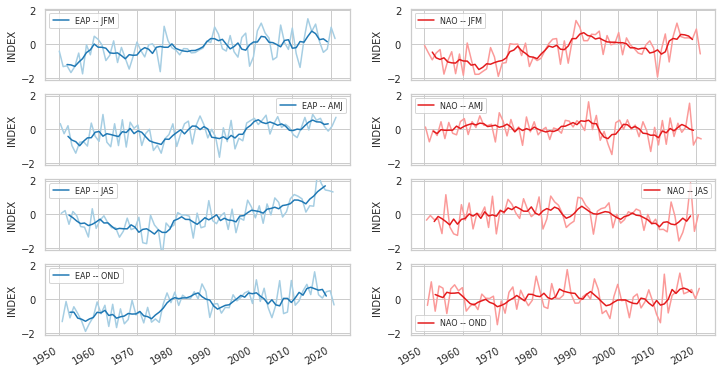

In [98]:
sns.set_palette("Paired",12)
fig,ax = plt.subplots(4,2,figsize = (12,6),sharex=True)

eap.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(1,None,12)).plot(ax=ax[0,0],color='C0')
eap.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(1,None,12)).rolling({'time':5},center=True).mean().plot(ax=ax[0,0],color='C1',label='EAP -- JFM')

ax[0,0].set_xlabel('')
ax[0,0].legend(fontsize=8)

eap.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(4,None,12)).plot(ax=ax[1,0],color='C0')
eap.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(4,None,12)).rolling({'time':5},center=True).mean().plot(ax=ax[1,0],color='C1',label='EAP -- AMJ')

ax[1,0].set_xlabel('')
ax[1,0].legend(fontsize=8)

eap.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(7,None,12)).plot(ax=ax[2,0],color='C0')
eap.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(7,None,12)).rolling({'time':5},center=True).mean().plot(ax=ax[2,0],color='C1',label='EAP -- JAS')

ax[2,0].set_xlabel('')
ax[2,0].legend(fontsize=8)

eap.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(10,None,12)).plot(ax=ax[3,0],color='C0')
eap.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(10,None,12)).rolling({'time':5},center=True).mean().plot(ax=ax[3,0],color='C1',label='EAP -- OND')

ax[3,0].set_xlabel('')
ax[3,0].legend(fontsize=8)


nao.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(1,None,12)).plot(ax=ax[0,1],color='C4')
nao.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(1,None,12)).rolling({'time':5},center=True).mean().plot(ax=ax[0,1],color='C5',label='NAO -- JFM')

ax[0,1].set_xlabel('')
ax[0,1].legend(fontsize=8)


nao.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(4,None,12)).plot(ax=ax[1,1],color='C4')
nao.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(4,None,12)).rolling({'time':5},center=True).mean().plot(ax=ax[1,1],color='C5',label='NAO -- AMJ')

ax[1,1].set_xlabel('')
ax[1,1].legend(fontsize=8)

nao.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(7,None,12)).plot(ax=ax[2,1],color='C4')
nao.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(7,None,12)).rolling({'time':5},center=True).mean().plot(ax=ax[2,1],color='C5',label='NAO -- JAS')

ax[2,1].set_xlabel('')
ax[2,1].legend(fontsize=8)

nao.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(10,None,12)).plot(ax=ax[3,1],color='C4')
nao.INDEX.rolling({'time':3},center=True).mean().isel(time=slice(10,None,12)).rolling({'time':5},center=True).mean().plot(ax=ax[3,1],color='C5',label='NAO -- OND')

ax[3,1].set_xlabel('')
ax[3,1].legend(fontsize=8)
plt.setp(ax, ylim=(-2.1,2.1))

plt.savefig(project_path / figure_path / Path('eapAndNaoSeasonal.png'),dpi=300)
plt.savefig(project_path / figure_path / Path('eapAndNaoSeasonal.pdf'))



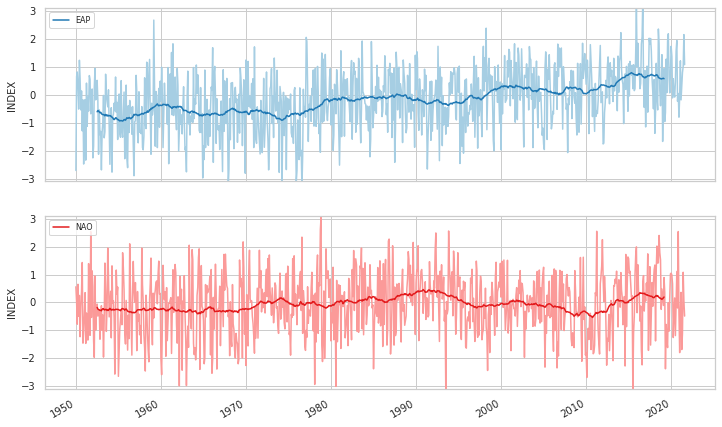

In [103]:
sns.set_palette("Paired",12)
fig,ax = plt.subplots(2,1,figsize = (12,7),sharex=True)

eap.INDEX.plot(ax=ax[0],color='C0')
eap.INDEX.rolling({'time':60},center=True).mean().plot(ax=ax[0],color='C1',label='EAP')

ax[0].set_xlabel('')
ax[0].legend(fontsize=8,loc='upper left')


nao.INDEX.plot(ax=ax[1],color='C4')
nao.INDEX.rolling({'time':60},center=True).mean().plot(ax=ax[1],color='C5',label='NAO')

ax[1].set_xlabel('')
ax[1].legend(fontsize=8,loc='upper left')

plt.setp(ax, ylim=(-3.1,3.1))

plt.savefig(project_path / figure_path / Path('eapAndNaoFull.png'),dpi=300)
plt.savefig(project_path / figure_path / Path('eapAndNaoFull.pdf'))

